<a href="https://colab.research.google.com/github/FerHdez24/Regresion_Lineal/blob/main/6_1_Regresi%C3%B3n_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [865]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **México_DF**

In [866]:
corr = []
det = []
Ta_V = []

In [867]:
#Carga desde un archivo .csv
DF= pd.read_csv("DF_clean.csv")
DF.head(5)

<ipython-input-867-b8a0699f231b>:2: DtypeWarning: Columns (1,3,9,25,64) have mixed types. Specify dtype option on import or set low_memory=False.
  DF= pd.read_csv("DF_clean.csv")


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1
0,0.0,2056638,https://www.airbnb.com/rooms/2056638,2.02E+13,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19,--
1,1.0,2072354,https://www.airbnb.com/rooms/2072354,2.02E+13,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54,"Located in Coyoacan, in a quiet neighborhood w..."
2,2.0,696037,https://www.airbnb.com/rooms/696037,2.02E+13,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31,"This area is called Nuevo Polanco, it has bein..."
3,3.0,35797,https://www.airbnb.com/rooms/35797,2.02E+13,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00,"Centro comercial Santa Fe, parque interlomas y..."
4,4.0,44616,https://www.airbnb.com/rooms/44616,2.02E+13,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46,--


In [868]:
#Identificar valores nulos por dataframe
valores_nulosto_Total=DF.isnull().sum().sum()
valores_nulosto_Total

3170

In [869]:
#datos cuantitativos remplazar por 0 
DF = DF.fillna(0)

In [870]:
#Identificar valores nulos por dataframe
valores_nulosto_Total=DF.isnull().sum().sum()
valores_nulosto_Total

0

In [871]:
DF['host_response_rate']

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
24220    0.0
24221    0.0
24222    1.0
24223    0.0
24224    0.0
Name: host_response_rate, Length: 24225, dtype: float64

## **Private room**

In [872]:
PR_DF = DF.loc[DF['room_type'] == "Private room"]
PR_DF

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1
7,7.0,61792,https://www.airbnb.com/rooms/61792,2.02E+13,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",https://a0.muscache.com/pictures/4c674e38-42f8...,299558,...,4.92,4.95,4.94,4.87,2.0,0.0,2.0,0.0,0.94,You are going to be in one of the nicest neigh...
16,16.0,760912,https://www.airbnb.com/rooms/760912,2.02E+13,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,https://a0.muscache.com/pictures/10580755/b2dc...,3817743,...,5.00,4.60,4.80,4.60,1.0,0.0,1.0,0.0,0.04,--
17,17.0,2088218,https://www.airbnb.com/rooms/2088218,2.02E+13,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,https://a0.muscache.com/pictures/32395878/54f6...,10659485,...,5.00,4.80,4.40,4.40,1.0,0.0,1.0,0.0,0.04,"Es una zona residencial de Coyoacán, ubicada e..."
18,18.0,2093036,https://www.airbnb.com/rooms/2093036,2.02E+13,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,https://a0.muscache.com/pictures/28553895/71d5...,3083561,...,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,El apartamento se encuentra en una zona reside...
21,21.0,131610,https://www.airbnb.com/rooms/131610,2.02E+13,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,0.00,0.00,0.00,0.00,3.0,1.0,2.0,0.0,0.00,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,24200.0,856000000000000000.0,https://www.airbnb.com/rooms/856473895554110501,20200000000000.0,30/03/23,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",https://a0.muscache.com/pictures/miso/Hosting-...,505303275,...,0.00,0.00,0.00,0.00,6.0,1.0,5.0,0.0,0.00,--
24214,24213.0,854000000000000000.0,https://www.airbnb.com/rooms/853707681690048732,20200000000000.0,30/03/23,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,...,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,Polanco one of the safest and best neighborhoo...
24216,24215.0,854000000000000000.0,https://www.airbnb.com/rooms/853746847434924262,20200000000000.0,29/03/23,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,https://a0.muscache.com/pictures/miso/Hosting-...,68325043,...,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,Many restaurant option as well as cafes and ba...
24219,24218.0,854000000000000000.0,https://www.airbnb.com/rooms/853922041242738127,20200000000000.0,29/03/23,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,https://a0.muscache.com/pictures/d2e3ac33-c092...,506810572,...,0.00,0.00,0.00,0.00,2.0,0.0,2.0,0.0,0.00,--


### **host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

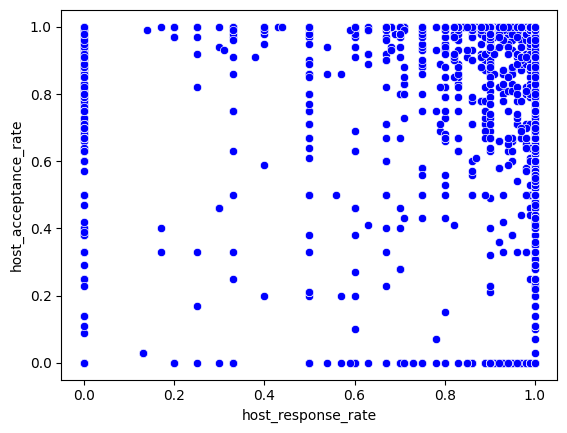

In [873]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PR_DF)

In [874]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['host_response_rate']]
Var_Dep= PR_DF['host_acceptance_rate']

In [875]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [876]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [877]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [878]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.30361209]),
 'rank_': 1,
 'singular_': array([35.02268297]),
 'intercept_': 0.5339403072822166}

**Modelo matemático: y= 0.59254031x + 0.3207896535817305**

---

In [879]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter1

0.10242991819597624

In [880]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.320046743767182

In [881]:
det.append(coef_Deter1)
corr.append(np.sqrt(coef_Correl1))
Ta_V.append("Private room / host_acceptance_rate vs host_response_rate")

### **host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

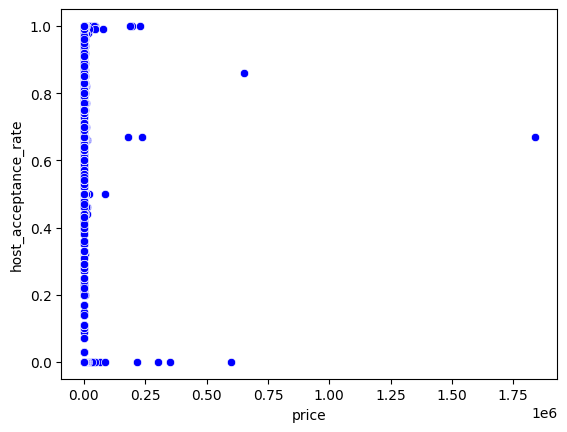

In [882]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=PR_DF)

In [883]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['price']]
Var_Dep= PR_DF['host_acceptance_rate']

In [884]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [885]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [886]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [887]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.49814314e-07]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 0.7731305870565954}

**Modelo matemático: y= -1.47290562e-05x + 0.9112905846283037**

---

In [888]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2

0.0005176144732649268

In [889]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.022751142240883794

In [890]:
det.append(coef_Deter2)
corr.append(np.sqrt(coef_Correl2))
Ta_V.append("Private room / host_acceptance_rate vs price")

### **host_acceptance_rate vs number_of_reviews** 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

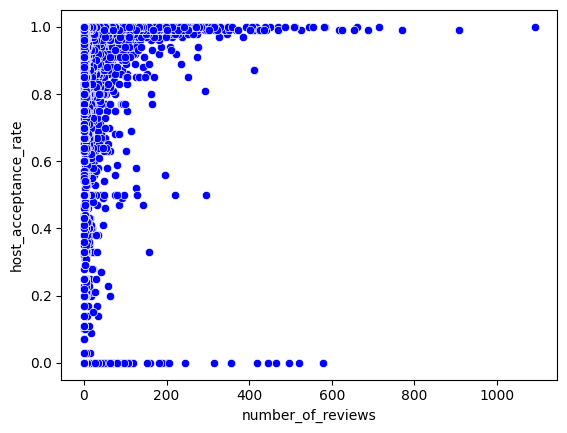

In [891]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=PR_DF)

In [892]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['number_of_reviews']]
Var_Dep= PR_DF['host_acceptance_rate']

In [893]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [894]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [895]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [896]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00102198]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 0.7461541467021322}

**Modelo matemático: y= 0.00132107x + 0.8466371558698922**

---

In [897]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter11=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter11

0.025621035420213434

In [898]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl11=np.sqrt(coef_Deter11)
coef_Correl11

0.1600657221900224

In [899]:
det.append(coef_Deter11)
corr.append(np.sqrt(coef_Correl11))
Ta_V.append("Private room / host_acceptance_rate vs number_of_reviews")

### **review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

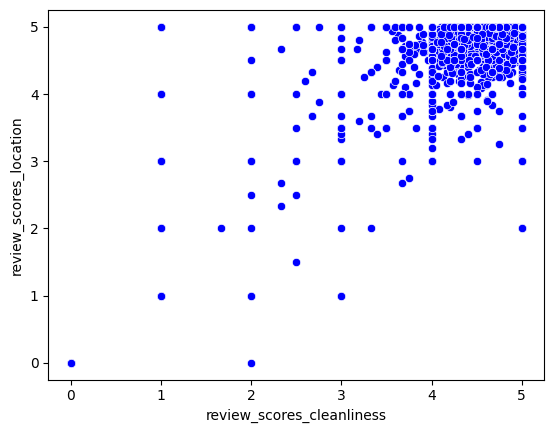

In [900]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=PR_DF)

In [901]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['review_scores_cleanliness']]
Var_Dep= PR_DF['review_scores_location']

In [902]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [903]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [904]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [905]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.00037091]),
 'rank_': 1,
 'singular_': array([181.95203241]),
 'intercept_': 0.07951183473700185}

**Modelo matemático: y= 1.00771463x + 0.023244773955535702**

---

In [906]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter3

0.972350250942289

In [907]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.986078217456551

In [908]:
det.append(coef_Deter3)
corr.append(np.sqrt(coef_Correl3))
Ta_V.append("Private room / review_scores_location vs review_scores_cleanliness")

### **availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

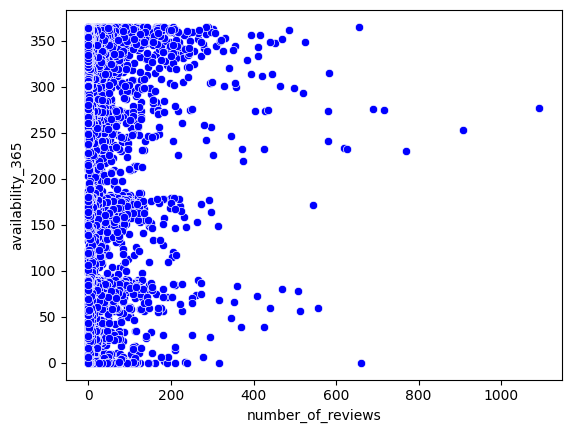

In [909]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=PR_DF)

In [910]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['number_of_reviews']]
Var_Dep= PR_DF['availability_365']

In [911]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [912]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [913]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [914]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

**Modelo matemático: y= -0.35915992x + 254.19984142300686**

---

In [915]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter4

0.001848740094272383

In [916]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.04299697773416619

In [917]:
det.append(coef_Deter4)
corr.append(np.sqrt(coef_Correl4))
Ta_V.append("Private room / availability_365 vs number_of_reviews")

### **reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

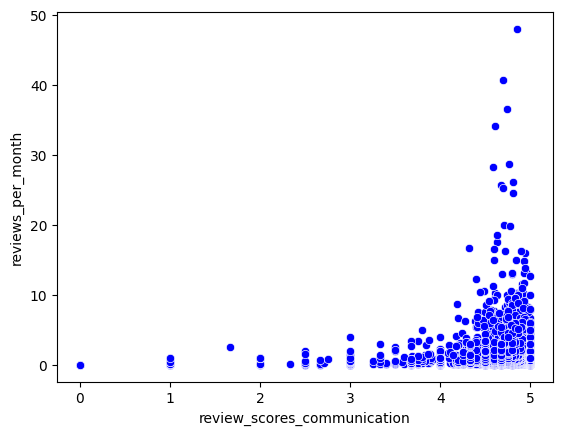

In [918]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=PR_DF)

In [919]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_DF[['review_scores_communication']]
Var_Dep= PR_DF['reviews_per_month']

In [920]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [921]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [922]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [923]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.27348516]),
 'rank_': 1,
 'singular_': array([184.37099199]),
 'intercept_': 0.023107190849919634}

**Modelo matemático: y= 0.1112462x + -0.008276751123786452**

---

In [924]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter5

0.08013727168058515

In [925]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.2830852728076562

In [926]:
det.append(coef_Deter5)
corr.append(np.sqrt(coef_Correl5))
Ta_V.append("Private room / reviews_per_month vs review_scores_communication")

## **Hotel room**

In [927]:
HR_DF = DF.loc[DF['room_type'] == "Hotel room"]
HR_DF

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1
14,14.0,737328,https://www.airbnb.com/rooms/737328,2.02E+13,29/03/23,city scrape,Business Suite BEIGE near Reforma,<b>The space</b><br />On your business or leis...,https://a0.muscache.com/pictures/10105792/ffaf...,3850198,...,5.0,5.0,4.83,4.78,11.0,7.0,0.0,0.0,0.18,--
53,53.0,865012,https://www.airbnb.com/rooms/865012,2.02E+13,29/03/23,city scrape,Business Suite RED near Reforma Av.,<b>The space</b><br />Beautiful business suite...,https://a0.muscache.com/pictures/12416374/df57...,3850198,...,5.0,5.0,4.97,4.97,11.0,7.0,0.0,0.0,0.25,--
55,55.0,868843,https://www.airbnb.com/rooms/868843,2.02E+13,30/03/23,city scrape,Business Suite PURPLE near Reforma,<b>The space</b><br />Beautiful business suite...,https://a0.muscache.com/pictures/12479457/a401...,3850198,...,5.0,5.0,5.00,4.90,11.0,7.0,0.0,0.0,0.46,--
62,62.0,869063,https://www.airbnb.com/rooms/869063,2.02E+13,30/03/23,city scrape,Business Suite BLACK near Reforma,Beautiful business suite facing our indoor pat...,https://a0.muscache.com/pictures/12482950/80ec...,3850198,...,5.0,5.0,4.95,4.95,11.0,7.0,0.0,0.0,0.25,We are located in the most developed area of M...
66,66.0,281134,https://www.airbnb.com/rooms/281134,2.02E+13,30/03/23,city scrape,COOL PENT HOUSE APARTMENT @CONDESA,Amazing Pent House apartment in the heart fo C...,https://a0.muscache.com/pictures/5754595/e5ec9...,196253,...,5.0,5.0,5.00,4.86,12.0,3.0,2.0,0.0,0.07,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9495.0,43205383.0,https://www.airbnb.com/rooms/43205383,20200000000000.0,30/03/23,city scrape,Emporio Ciudad de México,--,https://a0.muscache.com/pictures/6c22e4d1-2294...,336118145,...,5.0,5.0,5.00,5.00,2.0,0.0,1.0,0.0,0.12,--
9538,9537.0,43247503.0,https://www.airbnb.com/rooms/43247503,20200000000000.0,30/03/23,city scrape,FlowSuites Polanco,--,https://a0.muscache.com/pictures/3a86f189-ea18...,318447028,...,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--
9540,9539.0,43247525.0,https://www.airbnb.com/rooms/43247525,20200000000000.0,30/03/23,previous scrape,Krystal Grand Suites Insurgentes Ciudad De México,--,https://a0.muscache.com/pictures/97db0266-3607...,318980910,...,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--
9545,9544.0,43247567.0,https://www.airbnb.com/rooms/43247567,20200000000000.0,30/03/23,city scrape,CHAYA B&B,--,https://a0.muscache.com/pictures/20760914-ba9e...,319050749,...,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--


### **host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

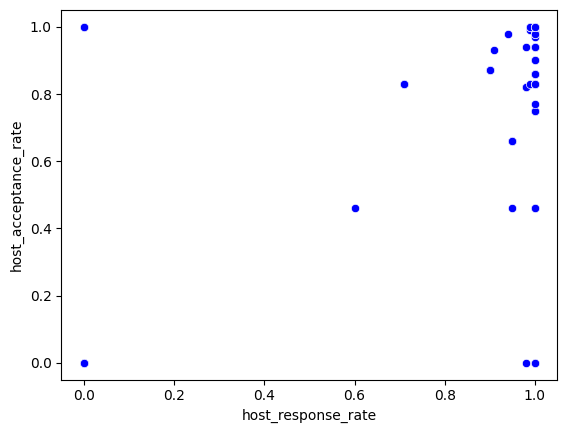

In [928]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=HR_DF)

In [929]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['host_response_rate']]
Var_Dep= HR_DF['host_acceptance_rate']

In [930]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [931]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [932]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [933]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.59254031]),
 'rank_': 1,
 'singular_': array([2.43933223]),
 'intercept_': 0.3207896535817305}

**Modelo matemático: y= 0.59254031x + 0.3207896535817305**

---

In [934]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter6

0.2764803721758494

In [935]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.5258140091095419

In [936]:
det.append(coef_Deter6)
corr.append(np.sqrt(coef_Correl6))
Ta_V.append("Hotel room / host_acceptance_rate vs host_response_rate")

### **host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

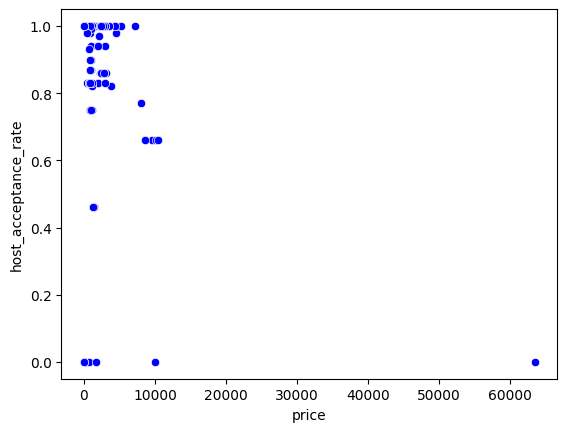

In [937]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=HR_DF)

In [938]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['price']]
Var_Dep= HR_DF['host_acceptance_rate']

In [939]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [940]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [941]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [942]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.47290562e-05]),
 'rank_': 1,
 'singular_': array([65531.08068275]),
 'intercept_': 0.9112905846283037}

**Modelo matemático: y= -1.47290562e-05x + 0.9112905846283037**

---

In [943]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter7

0.12329092094701422

In [944]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.351128069152858

In [945]:
det.append(coef_Deter7)
corr.append(np.sqrt(coef_Correl7))
Ta_V.append("Hotel room / host_acceptance_rate vs price")

### **host_acceptance_rate vs number_of_reviews** 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

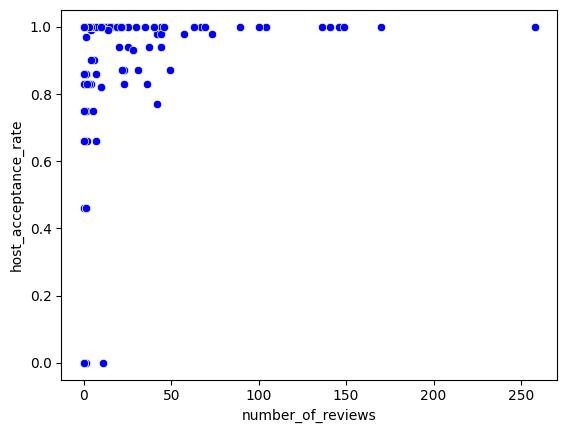

In [946]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=HR_DF)

In [947]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['number_of_reviews']]
Var_Dep= HR_DF['host_acceptance_rate']

In [948]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [949]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [950]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [951]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00132107]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 0.8466371558698922}

**Modelo matemático: y= 0.00132107x + 0.8466371558698922**

---

In [952]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04618901087177962

In [953]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2149162880560234

In [954]:
det.append(coef_Deter)
corr.append(np.sqrt(coef_Correl))
Ta_V.append("Hotel room / host_acceptance_rate vs number_of_reviews")

### **review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

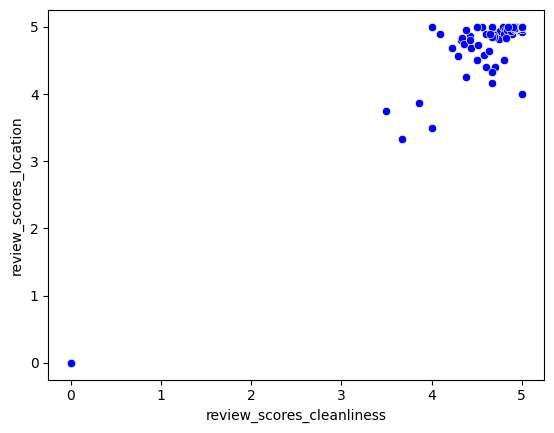

In [955]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=HR_DF)

In [956]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['review_scores_cleanliness']]
Var_Dep= HR_DF['review_scores_location']

In [957]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [958]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [959]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [960]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.00771463]),
 'rank_': 1,
 'singular_': array([21.92712853]),
 'intercept_': 0.023244773955535702}

**Modelo matemático: y= 1.00771463x + 0.023244773955535702**

---

In [961]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter8

0.9878155685108028

In [962]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.9938891127841187

In [963]:
det.append(coef_Deter8)
corr.append(np.sqrt(coef_Correl8))
Ta_V.append("Hotel room / review_scores_location vs review_scores_cleanliness")

### **availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

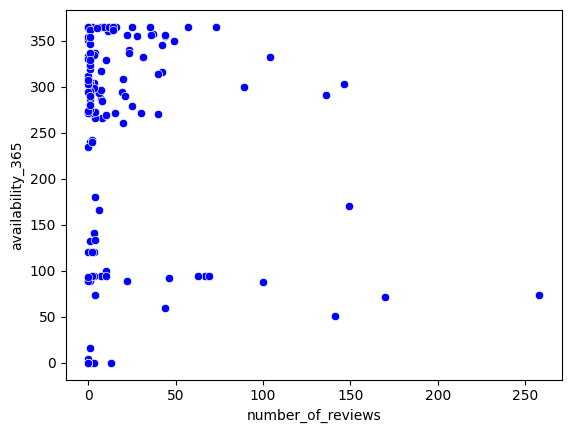

In [964]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=HR_DF)

In [965]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['number_of_reviews']]
Var_Dep= HR_DF['availability_365']

In [966]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [967]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [968]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [969]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.35915992]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 254.19984142300686}

**Modelo matemático: y= -0.35915992x + 254.19984142300686**

---

In [970]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.014844412000572182

In [971]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.12183764607284639

In [972]:
det.append(coef_Deter9)
corr.append(np.sqrt(coef_Correl9))
Ta_V.append("Hotel room / availability_365 vs number_of_reviews")

### **reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

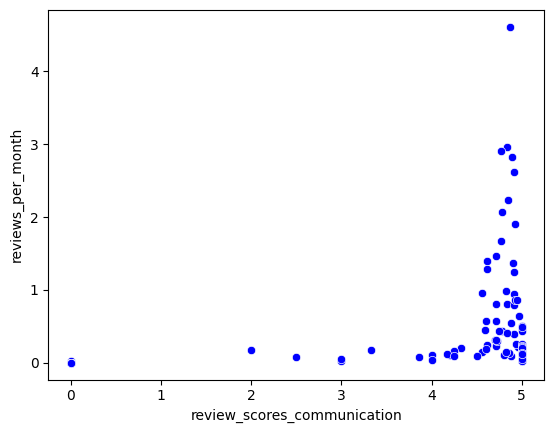

In [973]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=HR_DF)

In [974]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_DF[['review_scores_communication']]
Var_Dep= HR_DF['reviews_per_month']

In [975]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [976]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [977]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [978]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1112462]),
 'rank_': 1,
 'singular_': array([22.1189289]),
 'intercept_': -0.008276751123786452}

**Modelo matemático: y= 0.1112462x + (-0.008276751123786452)**

---

In [979]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter10

0.08953282465491796

In [980]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.29922036136419256

In [981]:
det.append(coef_Deter10)
corr.append(np.sqrt(coef_Correl10))
Ta_V.append("Hotel room / reviews_per_month vs review_scores_communication")

## **Tabla**

In [982]:
tabla = pd.DataFrame()
tabla['Tipo de habitación y Variables'] = Ta_V
tabla['Coef. Determinación'] = det
tabla['Coef. Correlación'] = corr
tabla

,Tipo de habitación y Variables,Coef. Determinación,Coef. Correlación
0,Private room / host_acceptance_rate vs host_re...,0.102430,0.565727
1,Private room / host_acceptance_rate vs price,0.000518,0.150835
2,Private room / host_acceptance_rate vs number_...,0.025621,0.400082
3,Private room / review_scores_location vs revie...,0.972350,0.993015
4,Private room / availability_365 vs number_of_r...,0.001849,0.207357
5,Private room / reviews_per_month vs review_sco...,0.080137,0.532058
6,Hotel room / host_acceptance_rate vs host_resp...,0.276480,0.725130
7,Hotel room / host_acceptance_rate vs price,0.123291,0.592561
8,Hotel room / host_acceptance_rate vs number_of...,0.046189,0.463591
9,Hotel room / review_scores_location vs review_...,0.987816,0.996940


# **EUA_California**

In [983]:
corr2 = []
det2 = []
Ta_V2 = []

In [984]:
EUA = pd.read_csv('California_clean.csv')

In [985]:
#Identificar valores nulos por dataframe
valores_nulosto_Total=EUA.isnull().sum().sum()
valores_nulosto_Total

1019

In [986]:
#datos cuantitativos remplazar por 0 
EUA = EUA.fillna(0)

In [987]:
#Identificar valores nulos por dataframe
valores_nulosto_Total=EUA.isnull().sum().sum()
valores_nulosto_Total

0

In [988]:
EUA['host_response_rate']

0       1.0
1       0.8
2       1.0
3       1.0
4       1.0
       ... 
6931    1.0
6932    0.0
6933    0.0
6934    1.0
6935    1.0
Name: host_response_rate, Length: 6936, dtype: float64

## **Private room**

In [989]:
PR_EUA = EUA.loc[EUA['room_type'] == "Private room"]
PR_EUA

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,2,1.0,0.73,13,37.765550,-122.452130,1,0,1,1,...,4 shared baths,1,"[""Security cameras on property"", ""Host greets ...",--,t,06/03/23,08/09/14,27/10/22,0,f
4,4,1.0,0.90,2,37.760300,-122.421970,3,0,1,1,...,1 private bath,1,"[""Paid parking garage off premises"", ""Luggage ...",--,t,06/03/23,01/08/09,25/02/23,STR-0000028,f
6,6,1.0,0.67,1,37.747660,-122.420410,2,0,1,1,...,1 bath,1,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",--,t,06/03/23,22/04/14,26/11/22,0,f
7,7,1.0,1.00,2,37.717500,-122.396980,2,0,1,1,...,1.5 shared baths,1,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",--,t,06/03/23,21/02/10,28/01/23,2022-011003STR,f
11,11,1.0,1.00,9,37.792330,-122.424310,1,0,1,1,...,--,1,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",--,t,06/03/23,10/07/11,28/02/23,0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,6927,1.0,0.98,32,37.788619,-122.422556,2,0,1,1,...,1 private bath,1,"[""Security cameras on property"", ""Self check-i...",--,t,06/03/23,13/02/23,13/02/23,Exempt,f
6929,6929,1.0,0.97,67,37.725231,-122.404776,2,0,1,1,...,1 shared bath,1,"[""Oven"", ""Security cameras on property"", ""Self...",--,t,06/03/23,--,--,0,f
6930,6930,1.0,1.00,6,37.753771,-122.399004,1,0,1,1,...,1 shared bath,1,"[""Carbon monoxide alarm"", ""Security cameras on...",--,t,06/03/23,--,--,0,t
6933,6933,0.0,0.00,1,37.777633,-122.416478,1,0,1,1,...,1 shared bath,1,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",--,t,06/03/23,--,--,0,f


### **host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

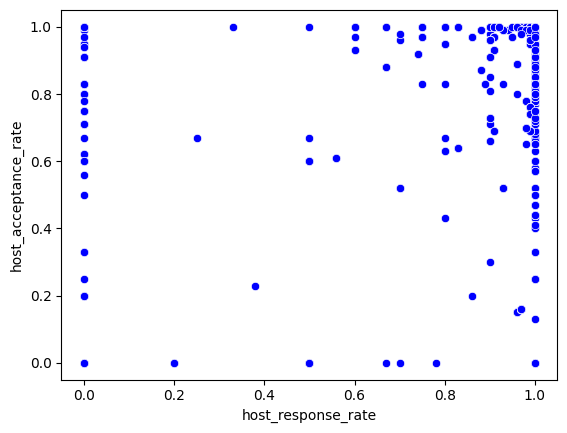

In [990]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PR_EUA)

In [991]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['host_response_rate']]
Var_Dep= PR_EUA['host_acceptance_rate']

In [992]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [993]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [994]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [995]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.73408963]),
 'rank_': 1,
 'singular_': array([18.6491753]),
 'intercept_': 0.1964043107585305}

**Modelo matemático: y= 0.73408963x + 0.1964043107585305**

---

In [996]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter13=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter13

0.5963243998147931

In [997]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl13=np.sqrt(coef_Deter13)
coef_Correl13

0.7722204347301314

In [998]:
det2.append(coef_Deter13)
corr2.append(np.sqrt(coef_Correl13))
Ta_V2.append("Private room / host_acceptance_rate vs host_response_rate")

### **host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

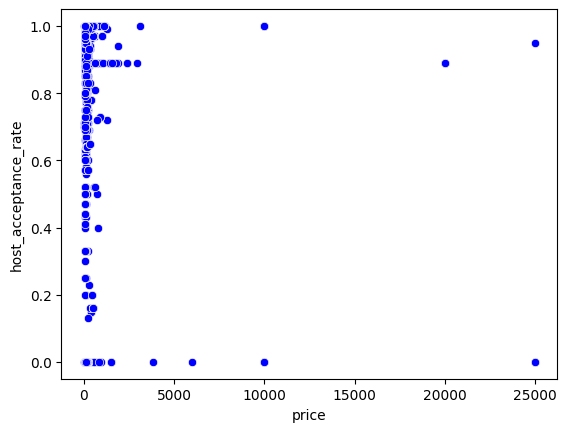

In [999]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=PR_EUA)

In [1000]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['price']]
Var_Dep= PR_EUA['host_acceptance_rate']

In [1001]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1002]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1003]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1004]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.60437173e-06]),
 'rank_': 1,
 'singular_': array([97252.31505148]),
 'intercept_': 0.7764454837639937}

**Modelo matemático: y= -4.60437173e-06x + 0.7764454837639937**



---

In [1005]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter14=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter14

0.0006379781398162532

In [1006]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl14=np.sqrt(coef_Deter14)
coef_Correl14

0.0252582291504423

In [1007]:
det2.append(coef_Deter14)
corr2.append(np.sqrt(coef_Correl14))
Ta_V2.append("Private room / host_acceptance_rate vs price")

### **host_acceptance_rate vs number_of_reviews** 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

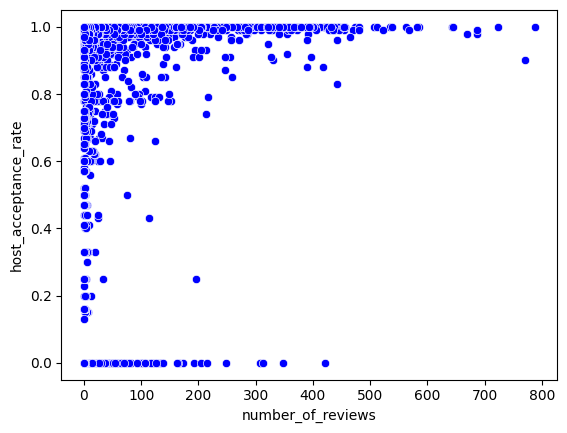

In [1008]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=PR_EUA)

In [1009]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['number_of_reviews']]
Var_Dep= PR_EUA['host_acceptance_rate']

In [1010]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1011]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1012]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1013]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00077924]),
 'rank_': 1,
 'singular_': array([4963.93141039]),
 'intercept_': 0.7305066557520314}

**Modelo matemático: y= 0.00077924x + 0.7305066557520314**

---

In [1014]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter15=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter15

0.047605395563667496

In [1015]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl15=np.sqrt(coef_Deter15)
coef_Correl15

0.2181866072050883

In [1016]:
det2.append(coef_Deter15)
corr2.append(np.sqrt(coef_Correl15))
Ta_V2.append("Private room / host_acceptance_rate vs number_of_reviews")

### **review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

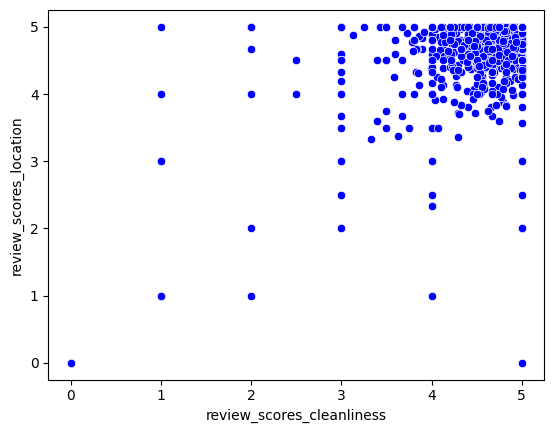

In [1017]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=PR_EUA)

In [1018]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['review_scores_cleanliness']]
Var_Dep= PR_EUA['review_scores_location']

In [1019]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1020]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1021]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1022]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97866682]),
 'rank_': 1,
 'singular_': array([91.74918226]),
 'intercept_': 0.11935559644513294}

**Modelo matemático: y= 0.97866682x + 0.11935559644513294**

---

In [1023]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter16=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter16

0.9506151120507869

In [1024]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl16=np.sqrt(coef_Deter16)
coef_Correl

0.2149162880560234

In [1025]:
det2.append(coef_Deter16)
corr2.append(np.sqrt(coef_Correl16))
Ta_V2.append("Private room / review_scores_location vs review_scores_cleanliness")

### **availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

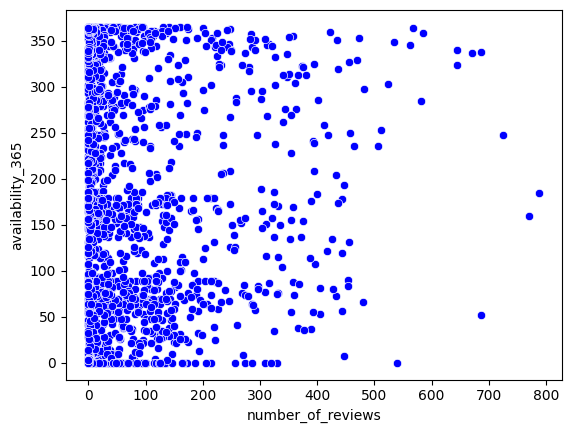

In [1026]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=PR_EUA)

In [1027]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['number_of_reviews']]
Var_Dep= PR_EUA['availability_365']

In [1028]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1029]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1030]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1031]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00252966]),
 'rank_': 1,
 'singular_': array([4963.93141039]),
 'intercept_': 177.4508942427995}

**Modelo matemático: y= -0.00252966x + 177.4508942427995**

---

In [1032]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter17=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter17

3.6539619377995436e-06

In [1033]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl17=np.sqrt(coef_Deter17)
coef_Correl17

0.0019115339227436022

In [1034]:
det2.append(coef_Deter17)
corr2.append(np.sqrt(coef_Correl17))
Ta_V2.append("Private room / availability_365 vs number_of_reviews")

### **reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

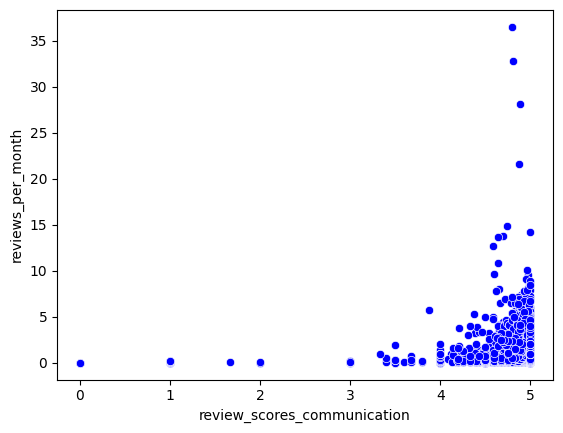

In [1035]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=PR_EUA)

In [1036]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['review_scores_communication']]
Var_Dep= PR_EUA['reviews_per_month']

In [1037]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1038]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1039]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1040]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.31579625]),
 'rank_': 1,
 'singular_': array([93.10241617]),
 'intercept_': -0.019120922740823776}

**Modelo matemático: y= 0.31579625x + (-0.019120922740823776)**

---

In [1041]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter18=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter18

0.0843688267587056

In [1042]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl18=np.sqrt(coef_Deter18)
coef_Correl18

0.29046312461086277

In [1043]:
det2.append(coef_Deter18)
corr2.append(np.sqrt(coef_Correl18))
Ta_V2.append("Private room / reviews_per_month vs review_scores_communication")

## **Hotel room**

In [1044]:
HR_EUA = EUA.loc[EUA['room_type'] == "Hotel room"]
HR_EUA

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,711,0.99,1.00,16,37.799200,-122.423580,2,0,1,1,...,1 private bath,1,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",--,t,06/03/23,22/11/14,19/02/23,FY 2017-18,t
787,787,0.99,1.00,16,37.796960,-122.425390,4,0,1,2,...,1 private bath,1,"[""Security cameras on property"", ""Self check-i...",--,t,06/03/23,25/05/15,11/12/22,FY 2017-18,t
938,938,1.00,0.92,5,37.787290,-122.409280,4,0,1,2,...,1 private bath,1,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",--,t,06/03/23,05/09/15,01/08/21,License not needed per OSTR,f
1704,1704,0.99,1.00,14,37.777220,-122.415600,1,0,1,1,...,4 shared baths,1,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,10/02/17,20/02/23,Exempt,f
2229,2229,0.80,1.00,61,37.786690,-122.408820,2,0,0,1,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,22/05/19,04/09/22,1083521,t
2230,2230,0.80,1.00,61,37.787450,-122.407140,2,0,0,1,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,10/05/19,16/02/20,1083521,t
2246,2246,0.80,1.00,61,37.785960,-122.408560,2,0,0,1,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,15/03/18,13/11/22,1083521,t
2247,2247,0.80,1.00,61,37.785940,-122.407040,2,0,0,1,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,15/04/18,15/09/22,1083521,t
2248,2248,0.80,1.00,61,37.787520,-122.407120,2,0,0,1,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,16/03/18,29/02/20,1083521,t
2252,2252,0.80,1.00,61,37.787970,-122.409070,2,0,0,1,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,24/03/18,25/02/20,1083521,t


### **host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

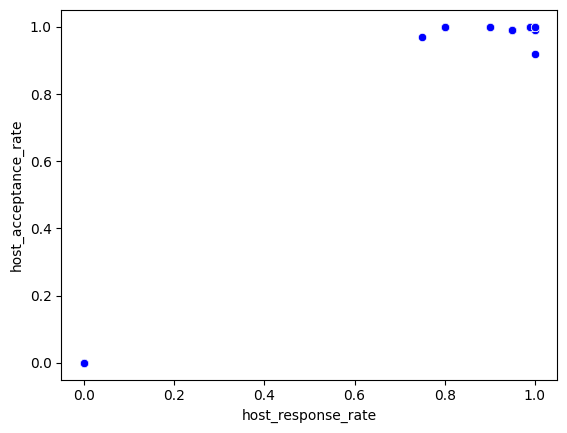

In [1045]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=HR_EUA)

In [1046]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['host_response_rate']]
Var_Dep= HR_EUA['host_acceptance_rate']

In [1047]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1048]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1049]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1050]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.02523785]),
 'rank_': 1,
 'singular_': array([2.58350537]),
 'intercept_': 0.0381930481684023}

**Modelo matemático: y= 1.02523785x + 0.0381930481684023**

---

In [1051]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter19=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter19

0.951897521440099

In [1052]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl19=np.sqrt(coef_Deter19)
coef_Correl19

0.9756523568567336

In [1053]:
det2.append(coef_Deter19)
corr2.append(np.sqrt(coef_Correl19))
Ta_V2.append("Hotel room / host_acceptance_rate vs host_response_rate")

### **host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

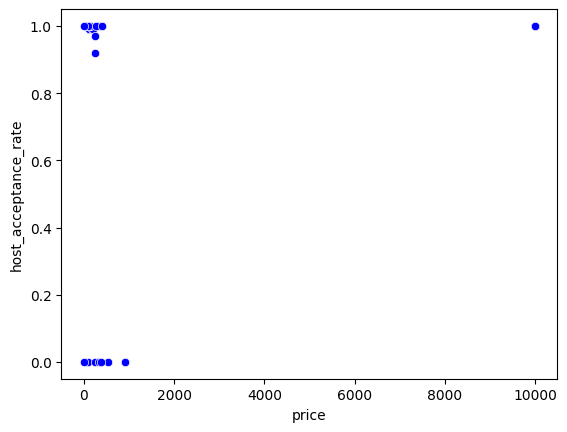

In [1054]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=HR_EUA)

In [1055]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['price']]
Var_Dep= HR_EUA['host_acceptance_rate']

In [1056]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1057]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1058]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1059]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.37986599e-05]),
 'rank_': 1,
 'singular_': array([18888.09646464]),
 'intercept_': 0.8094552245787601}

**Modelo matemático: y= 1.37986599e-05x + 0.8094552245787601**



---

In [1060]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter20=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter20

0.009216635348141544

In [1061]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl20=np.sqrt(coef_Deter20)
coef_Correl20

0.09600330904787367

In [1062]:
det2.append(coef_Deter20)
corr2.append(np.sqrt(coef_Correl20))
Ta_V2.append("Hotel room / host_acceptance_rate vs price")

### **host_acceptance_rate vs number_of_reviews** 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

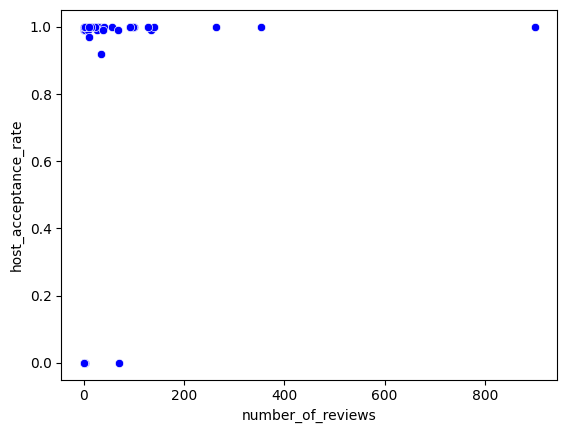

In [1063]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=HR_EUA)

In [1064]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['number_of_reviews']]
Var_Dep= HR_EUA['host_acceptance_rate']

In [1065]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1066]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1067]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1068]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00046365]),
 'rank_': 1,
 'singular_': array([975.14251424]),
 'intercept_': 0.7962857128180519}

**Modelo matemático: y= 0.00046365x + 0.7962857128180519**

---

In [1069]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter21=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter21

0.027736171539034737

In [1070]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl21=np.sqrt(coef_Deter21)
coef_Correl21

0.16654180117626546

In [1071]:
det2.append(coef_Deter21)
corr2.append(np.sqrt(coef_Correl21))
Ta_V2.append("Hotel room / host_acceptance_rate vs number_of_reviews")

### **review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

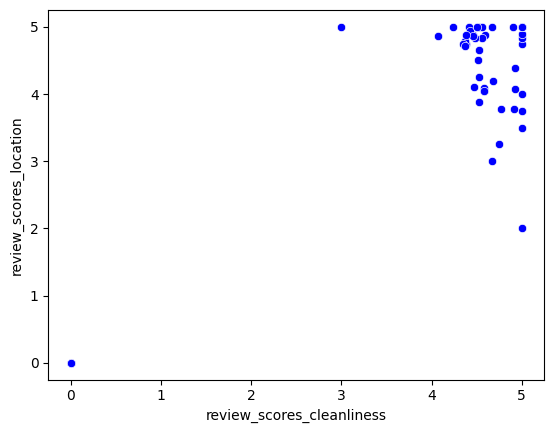

In [1072]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=HR_EUA)

In [1073]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['review_scores_cleanliness']]
Var_Dep= HR_EUA['review_scores_location']

In [1074]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1075]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1076]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1077]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.869787]),
 'rank_': 1,
 'singular_': array([9.23831518]),
 'intercept_': 0.4241255362221179}

**Modelo matemático: y= 0.869787x + 0.4241255362221179**

---

In [1078]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter22=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter22

0.685443264649231

In [1079]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl22=np.sqrt(coef_Deter22)
coef_Correl22

0.8279150105229588

In [1080]:
det2.append(coef_Deter22)
corr2.append(np.sqrt(coef_Correl22))
Ta_V2.append("Hotel room / review_scores_location vs review_scores_cleanliness")

### **availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

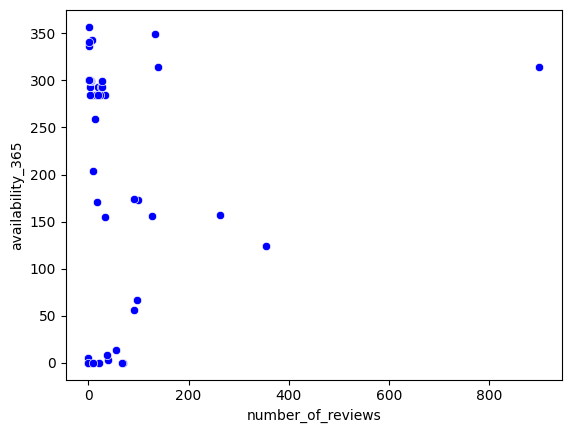

In [1081]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=HR_EUA)

In [1082]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['number_of_reviews']]
Var_Dep= HR_EUA['availability_365']

In [1083]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1084]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1085]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1086]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10665693]),
 'rank_': 1,
 'singular_': array([975.14251424]),
 'intercept_': 167.77747368533454}

**Modelo matemático: y= 0.10665693x + 167.77747368533454**

---

In [1087]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter23=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter23

0.01122457035412916

In [1088]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl23=np.sqrt(coef_Deter23)
coef_Correl23

0.10594607285845549

In [1089]:
det2.append(coef_Deter23)
corr2.append(np.sqrt(coef_Correl23))
Ta_V2.append("Hotel room / availability_365 vs number_of_reviews")

### **reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

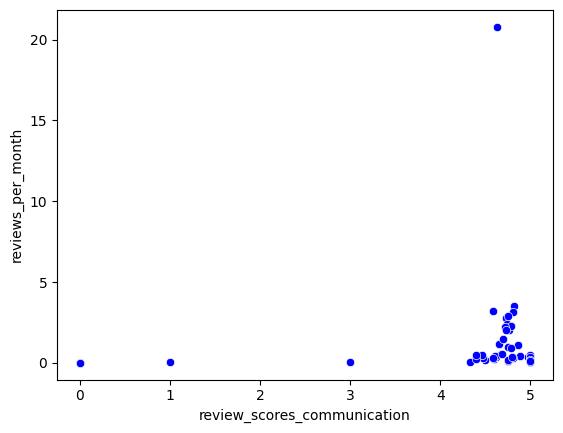

In [1090]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=HR_EUA)

In [1091]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['review_scores_communication']]
Var_Dep= HR_EUA['reviews_per_month']

In [1092]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1093]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1094]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1095]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.25601054]),
 'rank_': 1,
 'singular_': array([9.88430535]),
 'intercept_': 0.06559329219410226}

**Modelo matemático: y= 0.25601054x + 0.06559329219410226**

---

In [1096]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter24=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter24

0.014418582378406541

In [1097]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl24=np.sqrt(coef_Deter24)
coef_Correl24

0.12007740161415278

In [1098]:
det2.append(coef_Deter24)
corr2.append(np.sqrt(coef_Correl24))
Ta_V2.append("Hotel room / reviews_per_month vs review_scores_communication")

## **Tabla**

In [1099]:
tabla2 = pd.DataFrame()
tabla2['Tipo de habitación y Variables'] = Ta_V2
tabla2['Coef. Determinación'] = det2
tabla2['Coef. Correlación'] = corr2
tabla2

,Tipo de habitación y Variables,Coef. Determinación,Coef. Correlación
0,Private room / host_acceptance_rate vs host_re...,0.596324,0.878761
1,Private room / host_acceptance_rate vs price,0.000638,0.158928
2,Private room / host_acceptance_rate vs number_...,0.047605,0.467104
3,Private room / review_scores_location vs revie...,0.950615,0.987418
4,Private room / availability_365 vs number_of_r...,0.000004,0.043721
5,Private room / reviews_per_month vs review_sco...,0.084369,0.538946
6,Hotel room / host_acceptance_rate vs host_resp...,0.951898,0.987751
7,Hotel room / host_acceptance_rate vs price,0.009217,0.309844
8,Hotel room / host_acceptance_rate vs number_of...,0.027736,0.408095
9,Hotel room / review_scores_location vs review_...,0.685443,0.909898
